## Project Overview Description

Drug problems in the U.S. have been prevalent for many years and one important issue is deaths caused by drug overdose. For this project I wanted to conduct data analysis to determine if deaths by drug overdose have been increasing and which states have been affected the most. I am also interested specifically in the state of Arizona. My research will determine which states show an increase, decrease, or stability of overdose deaths. 

## Dataset Description

I am using three data sets, the first shows the number of drug overdose deaths in the U.S. by state in 2018, the second for drug overdose deaths by state in 2019, and the third the percent change in deaths by state from 2018-2019. All of the datasets were obtained from the CDC website. The dataset for Drug Overdose Deaths in 2018 did not have a downloadable CSV therefore the table information was trasferred to an Excel spreadsheet. After transferring, the appropriate column names were given and the '2018 Number of Deaths' column was correctly formatted from object type to float. Once all of the appropriate transformations were complete the file was saved as a CSV. The 2019 Drug Overdose Deaths dataset and 2018-2019 Drug Overdose Death Rate Increase dataset both had a column with NaN values which needed to be dropped to correctly compare all 3 datasets. 

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deaths2018 = pd.read_csv('2018-Deaths.csv')
deaths2018.head()

,Location,Range Category,2018 Age-adjusted Rate,2018 Number of Deaths
0,Alabama,16.1 to 18.5,16.6,775.0
1,Alaska,13.6 to 16.0,14.6,110.0
2,Arizona,21.1 to 57.0,23.8,1670.0
3,Arkansas,13.6 to 16.0,15.7,444.0
4,California,11.1 to 13.5,12.8,5348.0


In [3]:
deaths2019 = pd.read_csv('2019-Deaths.csv')
deaths2019.head()

,Location,Range Category,2019 Age-adjusted Rate,2019 Number of Deaths
0,Alabama,16.1 to 18.5,16.3,768.0
1,Alaska,16.1 to 18.5,17.8,132.0
2,Arizona,21.1 to 57.0,26.8,1907.0
3,Arkansas,11.1 to 13.5,13.5,388.0
4,California,13.6 to 16.0,15.0,6198.0


In [4]:
deathchange = pd.read_csv('2018-2019-Deaths.csv')
deathchange.head()

,Location,Statistically Significant Change,Percent Change from 2018-2019
0,Alabama,Stable,-1.8
1,Alaska,Stable,21.9
2,Arizona,Increase,12.6
3,Arkansas,Decrease,-14.0
4,California,Increase,17.2


In [5]:
deaths2018.shape

(51, 4)

In [6]:
deaths2019.shape

(52, 4)

In [7]:
deathchange.shape

(52, 3)

The deaths dataset for 2019 and the change in deaths 2018-2019 deaths dataset both have an extra row compared to the 2018 dataset. 

In [10]:
deaths2019.tail()

,Location,Range Category,2019 Age-adjusted Rate,2019 Number of Deaths
47,Washington,13.6 to 16.0,15.8,1259.0
48,West Virginia,21.1 to 57.0,52.8,870.0
49,Wisconsin,21.1 to 57.0,21.1,1201.0
50,Wyoming,13.6 to 16.0,14.1,79.0
51,NaN,NaN,NaN,NaN


In [11]:
deathchange.tail()

,Location,Statistically Significant Change,Percent Change from 2018-2019
47,Washington,Stable,6.8
48,West Virginia,Stable,2.5
49,Wisconsin,Increase,9.9
50,Wyoming,Stable,27.0
51,NaN,NaN,NaN


We can see that both of the datasets contain a row with NaN values that do not pertain to the dataset. The NaN rows can be dropped from both datasets to have comparable sized datasets.

In [13]:
deaths2019.isnull().sum()

Location                  1
Range Category            1
2019 Age-adjusted Rate    1
2019 Number of Deaths     1
dtype: int64

In [16]:
deaths2019 = deaths2019.dropna()

In [17]:
deaths2019.tail()

,Location,Range Category,2019 Age-adjusted Rate,2019 Number of Deaths
46,Virginia,16.1 to 18.5,18.3,1547.0
47,Washington,13.6 to 16.0,15.8,1259.0
48,West Virginia,21.1 to 57.0,52.8,870.0
49,Wisconsin,21.1 to 57.0,21.1,1201.0
50,Wyoming,13.6 to 16.0,14.1,79.0


In [18]:
deaths2019.shape

(51, 4)

In [19]:
deathchange.isnull().sum()

Location                             1
Statistically Significant Change     1
Percent Change from 2018-2019        1
dtype: int64

In [20]:
deathchange = deathchange.dropna()

In [21]:
deathchange.tail()

,Location,Statistically Significant Change,Percent Change from 2018-2019
46,Virginia,Stable,7.0
47,Washington,Stable,6.8
48,West Virginia,Stable,2.5
49,Wisconsin,Increase,9.9
50,Wyoming,Stable,27.0


In [22]:
deathchange.shape

(51, 3)

Visualize the types of data for each dataset

In [23]:
deaths2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                51 non-null     object 
 1   Range Category          51 non-null     object 
 2   2018 Age-adjusted Rate  51 non-null     float64
 3   2018 Number of Deaths   51 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [24]:
deaths2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                51 non-null     object 
 1   Range Category          51 non-null     object 
 2   2019 Age-adjusted Rate  51 non-null     float64
 3   2019 Number of Deaths   51 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [25]:
deathchange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Location                           51 non-null     object 
 1   Statistically Significant Change   51 non-null     object 
 2   Percent Change from 2018-2019      51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


After looking at the datatypes that each dataset has we can see that all of the columns have the appropriate datatypes for data exploration.

In [26]:
deaths2018.describe()

,2018 Age-adjusted Rate,2018 Number of Deaths
count,51.000000,51.000000
mean,22.039216,1320.921569
std,10.025389,1320.472171
min,6.900000,57.000000
25%,13.750000,331.000000
50%,21.200000,856.000000
75%,27.700000,1746.500000
max,51.500000,5348.000000


In [27]:
deaths2019.describe()

,2019 Age-adjusted Rate,2019 Number of Deaths
count,51.000000,51.000000
mean,23.139216,1384.901961
std,10.184009,1407.558557
min,8.700000,79.000000
25%,14.650000,379.500000
50%,21.100000,870.000000
75%,30.050000,1998.000000
max,52.800000,6198.000000


In [28]:
deathchange.describe()

,Percent Change from 2018-2019
count,51.000000
mean,7.096078
std,11.968709
min,-14.000000
25%,-1.250000
50%,6.800000
75%,13.050000
max,52.200000


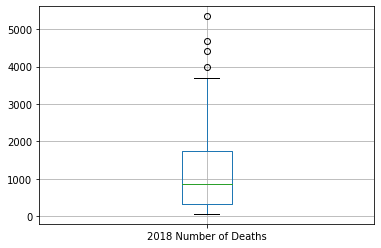

In [36]:
deaths2018.boxplot(column=['2018 Number of Deaths']);

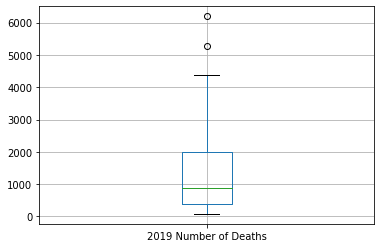

In [37]:
deaths2019.boxplot(column=['2019 Number of Deaths']);

## Data Wrangling

In [38]:
deaths2018.shape

(51, 4)

In [39]:
deaths2019.shape

(51, 4)

In [40]:
deathchange.shape

(51, 3)

The deaths2018 and deaths2019 dataframes (datasets) are the same shape so the data will be comparable. The deathchange dataframe we just need info from the third column 'Percent Change from 2018-2019').

## Statistical Analysis

Hypothesis: Deaths by drug overdose has increased from 2018 to 2019. 